In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('hotel_booking.csv')

# EDA and data cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


* droping the columns containing personal information

In [6]:
df.drop(columns=['phone-number','name','email','credit_card'], axis=1, inplace=True)

In [7]:
df.shape

(119390, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [11]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('*' * 50)
    

hotel
['Resort Hotel' 'City Hotel']
**************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.drop(columns=['company', 'agent'], axis=1, inplace=True)
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.shape

(118898, 30)

<Axes: >

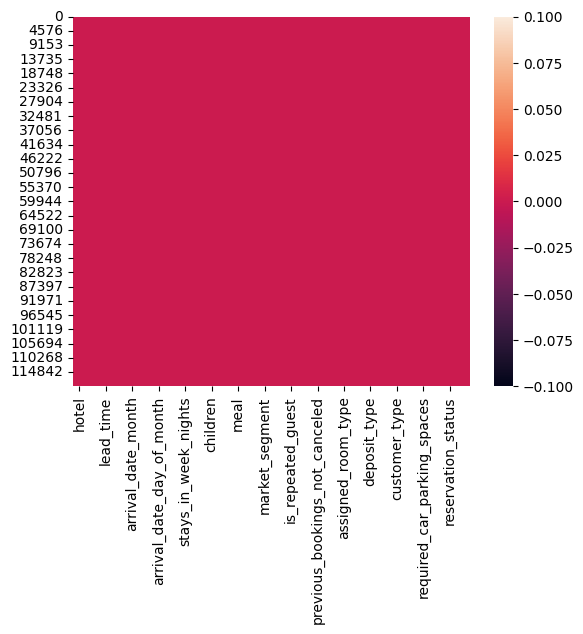

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


# Visualization

In [19]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
cancelled_perc * 100

is_canceled
0    62.864808
1    37.135192
Name: proportion, dtype: float64

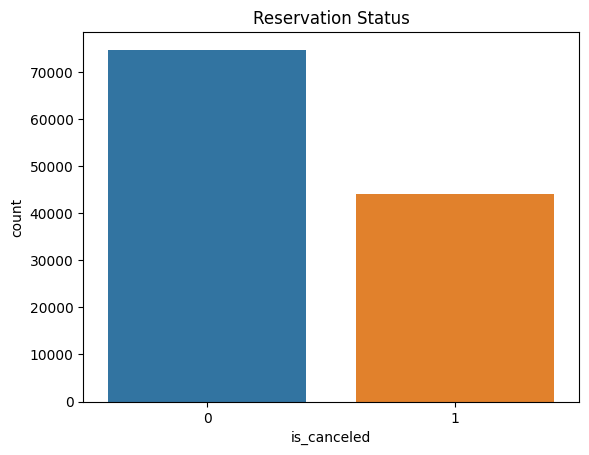

In [20]:
plt.title('Reservation Status')
sns.countplot(df, x=df['is_canceled'])
plt.show()

* The 37% of the reservations are canceled overall.
* In City Hotel the reservation cancel rate is higher than the resort hotel, 41% of the reservations in the City Hotel are canceled.
* In Resort Hotel the reservation cancle rate is 27%.

<Axes: xlabel='hotel', ylabel='count'>

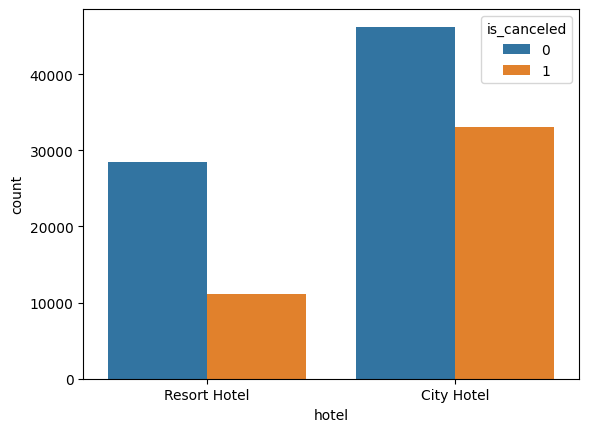

In [21]:
sns.countplot(df, x='hotel', hue='is_canceled')

In [22]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
(resort_hotel['is_canceled'].value_counts(normalize=True)) * 100

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [23]:
city_hotel = df[df['hotel'] == 'City Hotel']
(city_hotel['is_canceled'].value_counts(normalize=True)) * 100

is_canceled
0    58.29109
1    41.70891
Name: proportion, dtype: float64

In [44]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()


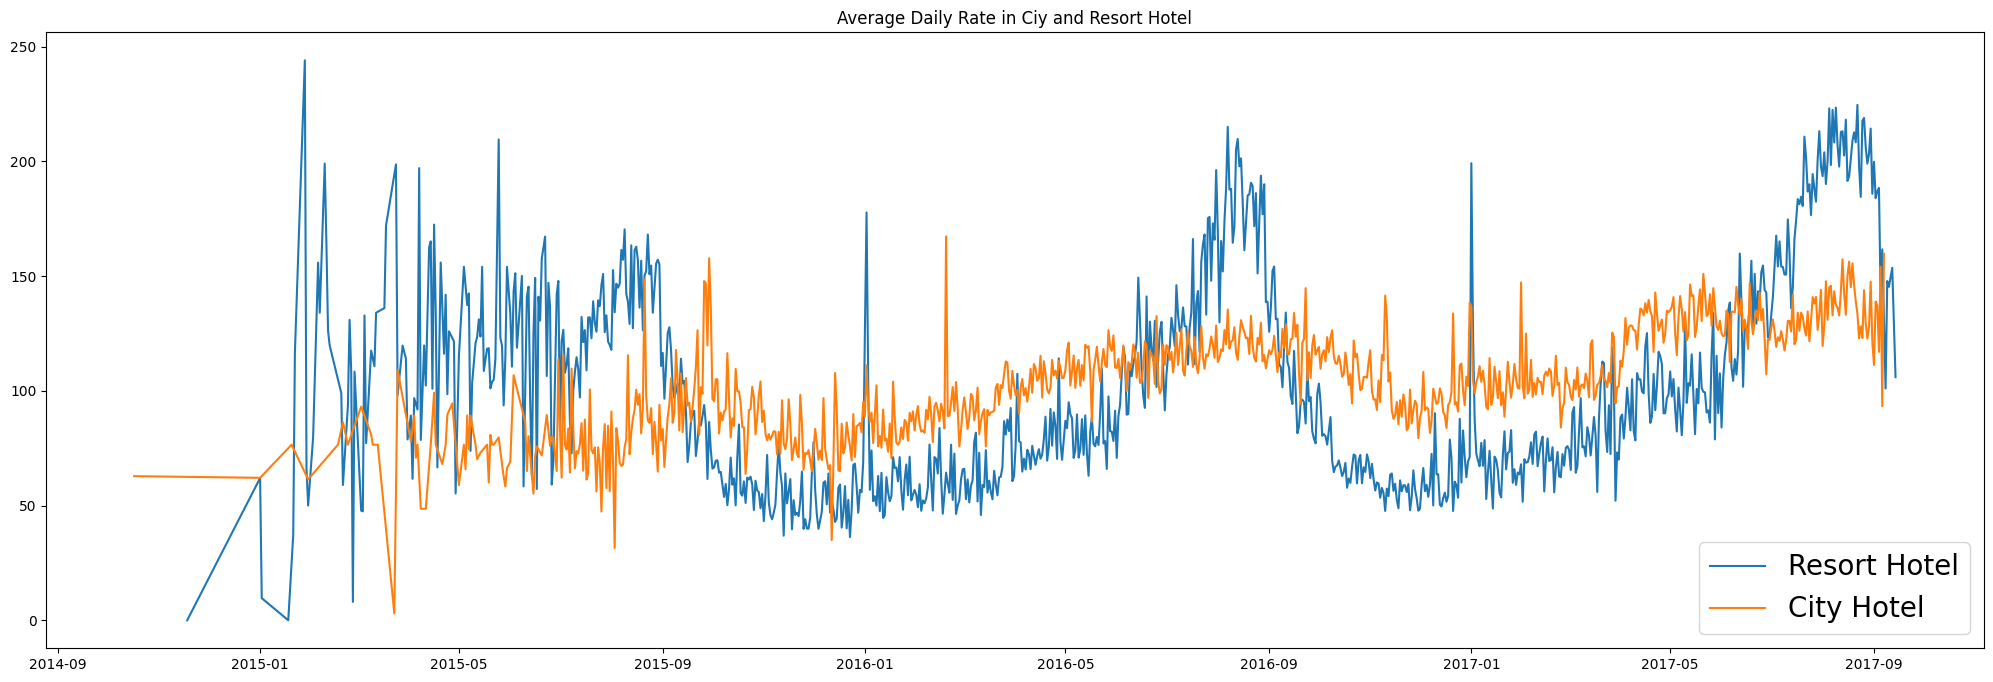

In [25]:
plt.figure(figsize=(25,8))
plt.title('Average Daily Rate in City and Resort Hotel')
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)
plt.show()

* The average daily rate for a city hotel is less than that of a resort hotel.

In [26]:
df['month'] = df['reservation_status_date'].dt.month


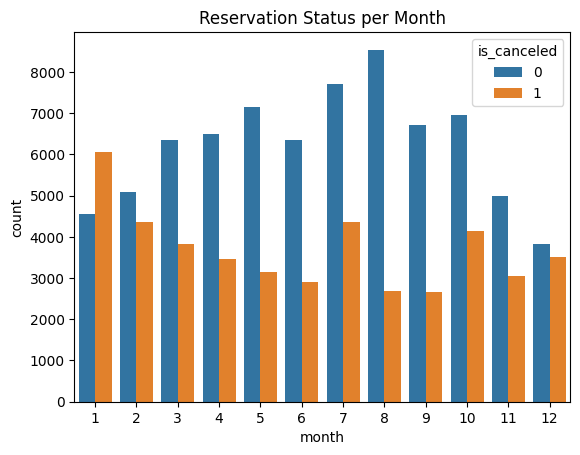

In [27]:
plt.title('Reservation Status per Month')
sns.countplot(df, x='month', hue='is_canceled')
plt.show()

* The number of confirmed and the canceled reservations are the largest in the month of August.
* In January we have observed the reservation cancel rate is much higher.
* In December the reservation confirmation and canceling rates are nearly equal.

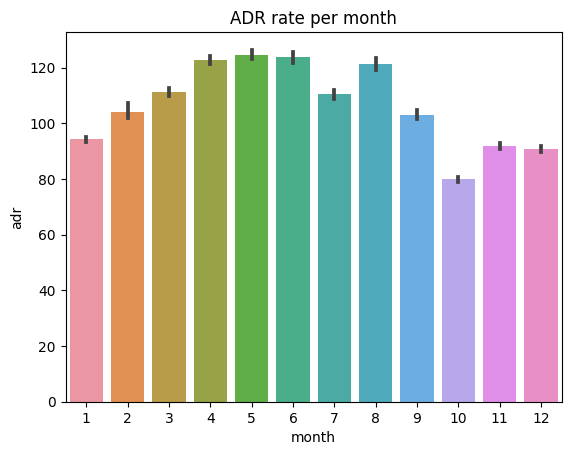

In [46]:
plt.title('ADR rate per month')
sns.barplot( x='month', y='adr', data=df[df['is_canceled'] == 1])
plt.show()

* It is also noted that the cancelation rate is higher in those months here rent was higher.

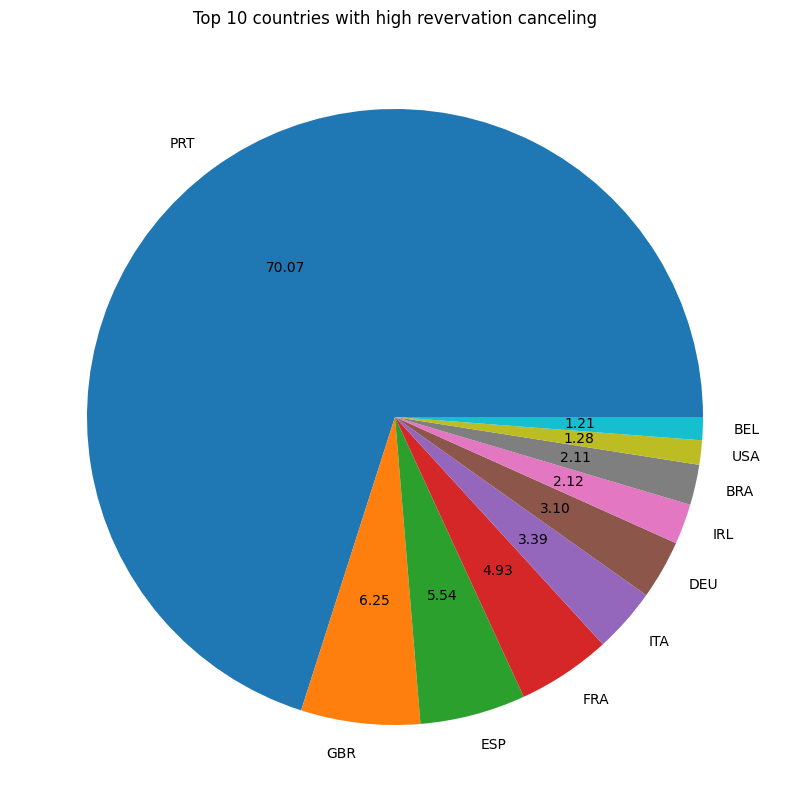

In [29]:
canceled_res = df[df['is_canceled'] == 1]
top_10 = canceled_res['country'].value_counts().head(10)
plt.figure(figsize=(20, 10))
plt.title('Top 10 countries with high revervation canceling')
plt.pie(top_10 ,autopct='%.2f', labels=top_10.index)
plt.show()

Portugal is the top Country with Highest reservation cancellations. 

In [30]:
(df['market_segment'].value_counts(normalize=True)) * 100

market_segment
Online TA        47.437299
Offline TA/TO    20.319938
Groups           16.657976
Direct           10.469478
Corporate         4.298643
Complementary     0.617336
Aviation          0.199331
Name: proportion, dtype: float64

In [31]:
(canceled_res['market_segment'].value_counts(normalize=True)) * 100

market_segment
Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: proportion, dtype: float64

Around 46% percent of the clients are coming from Online agencies, 27% from Groups and only 4% of the clients coming directly.


In [48]:
df.groupby('is_canceled')[['adr','hotel']].value_counts()

is_canceled  adr     hotel       
0            65.0    City Hotel      1375
             75.0    City Hotel      1219
             0.0     City Hotel      1079
             95.0    City Hotel       812
             90.0    City Hotel       779
                                     ... 
1            388.0   Resort Hotel       1
             392.0   Resort Hotel       1
             437.0   Resort Hotel       1
             450.0   Resort Hotel       1
             5400.0  City Hotel         1
Name: count, Length: 14178, dtype: int64

* The high rates directly causing the Reservation cancellation.

# Suggestions

1. Cancellation rates rise as the price does. In order to prevent this pricing Satrategies in City and specially Resort Hotel must be change.
2. The Resort Hotel has the higher cancellation rate, So they can provide the reasonable discounts on weekends and Holidays.
3. They really need to uplift the quality of the Hotels in Portugal as to reduce the cancellation rate.
4. Most of the Clients comes from online agencies, but the Cancellation rate is also high, to reduce the cancellation rate they also need to focus on the advance payments as Reservation-Fee. 